In [130]:
import pandas as pd
import datetime as dt 
import yfinance as yf
import numpy as np
import seaborn as sns 
import math 
import matplotlib.pyplot as plt
import scipy.optimize as sco
import random

In [131]:
#7 assets and historical data
stocks = ['AAPL', 'TSLA', 'NFLX', 'GM', 'AMZN', 'GOOG', 'TGT']

eD=dt.datetime.today()
sD=eD-dt.timedelta(2*365)

Adjclose=yf.download(stocks,
                  period = '2y')['Adj Close'].pct_change()

returns=price
al=len(stocks)

[*********************100%***********************]  7 of 7 completed


[*********************100%***********************]  7 of 7 completed


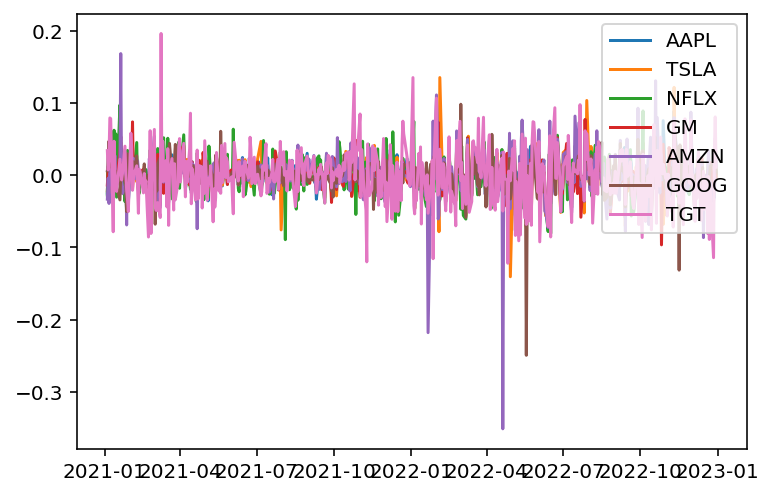

In [132]:
#Daily close data on your assets
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

assets=stocks
assets = ['AAPL','TSLA', 'NFLX', 'GM', 'AMZN', 'GOOG', 'TGT']
assets_data = yf.download(assets, "2020-12-31", "2022-12-31") ["Adj Close"]
rets = assets_data.pct_change()
assets_data.dropna(inplace=True) #dropping NaN values
assets_dataframe = assets_data.head()

plt.plot(rets)
plt.legend(['AAPL', 'TSLA', 'NFLX', 'GM', 'AMZN', 'GOOG', 'TGT'], loc=1, fontsize=10)

In [133]:
rets.head().dropna()

,AAPL,AMZN,GM,GOOG,NFLX,TGT,TSLA
Date,,,,,,,
2021-01-04,-0.024719,-0.021585,-0.027137,-0.013494,-0.033048,0.006231,0.034152
2021-01-05,0.012363,0.010004,0.028388,0.007337,-0.003940,0.015425,0.007317
2021-01-06,-0.033661,-0.024897,0.031685,-0.003234,-0.038998,0.047403,0.028390
2021-01-07,0.034123,0.007577,0.007911,0.029943,0.016784,0.011539,0.079447


In [134]:
#Mean, Variance, Correlation Matrix
returns=Adjclose.pct_change()
table_1 = pd.DataFrame(index=stocks)
table_1['Variance']=(Adjclose.pct_change()*100).var()
table_1['Mean']=returns.mean()

In [135]:
table_1

,Variance,Mean
AAPL,NaN,-inf
TSLA,NaN,inf
NFLX,2.040193e+06,-1.370793
GM,NaN,inf
AMZN,3.705551e+06,-0.421729
GOOG,3.117352e+06,-2.178321
TGT,NaN,inf


In [136]:
returns.corr()

,AAPL,AMZN,GM,GOOG,NFLX,TGT,TSLA
AAPL,1.000000,-0.008626,-0.018582,-0.058038,0.067820,-0.027279,-0.036775
AMZN,-0.008626,1.000000,-0.021644,-0.148852,-0.034307,0.018024,0.001733
GM,-0.018582,-0.021644,1.000000,-0.000809,-0.035481,0.250030,0.028788
GOOG,-0.058038,-0.148852,-0.000809,1.000000,0.021807,0.020411,0.024665
NFLX,0.067820,-0.034307,-0.035481,0.021807,1.000000,-0.013910,-0.012179
TGT,-0.027279,0.018024,0.250030,0.020411,-0.013910,1.000000,0.015152
TSLA,-0.036775,0.001733,0.028788,0.024665,-0.012179,0.015152,1.000000


In [145]:
port_returns = []
port_volatility = []
stock_weights = []
returns_annual = []

In [146]:
num_assets = len(assets)
num_portfolios = 50000

In [147]:
#Efficient Frontier
for single_portoflio in range (num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot (weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
portfolio = {'Returns': port_returns, 
             'Volatility' : port_volatility}

for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    
df = pd.Dataframe(portfolio)

column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

df = df[column_order]

df.head

ValueError: shapes (7,) and (0,) not aligned: 7 (dim 0) != 0 (dim 0)

In [1275]:
# Citation
- Credit given to Professor John Droescher
- https://www.learnpythonwithrune.org/calculate-the-market-sp-500-beta-with-python-for-any-stock/#:~:text=Step%203%3A%20Calculate%20the%20BETA 
- Hilpisch, Y. (2015). Python for finance. O'Reilly Media. 

SyntaxError: invalid syntax (2263023358.py, line 2)